# **5.1 Univariate Time Series using LSTM-based models**

**Course Name:** MDM | Deep Learning

**Lab Title:** Time Series Forecasting using LSTM

**Student Name:** Kaustubh Wagh

**Student ID:** 202201070021

**Date of Submission:** 22nd April 2025

**Group Members**: Jayesh Deshmukh, Alvin Abraham, Kaustubh Wagh

### Import Libraries

We begin by importing the necessary libraries for data handling, visualization, and model creation:

- **pandas** and **numpy** for data manipulation.
- **matplotlib** and **seaborn** for visualization.
- **sklearn** for data scaling and performance metrics.
- **keras** for building and training the LSTM model.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt


### Load and Explore Dataset

Next, we load the dataset using **pandas**. The dataset is fetched from a URL and we display the first few rows to get an overview of its structure:

- The dataset contains daily minimum temperatures over a period of time.


In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
df.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Data Preprocessing and Visualization

Here, we:

1. Convert the **'Date'** column to a **datetime** format to facilitate time series analysis.
2. Set the **'Date'** column as the **index** of the DataFrame for easier time series manipulation.
3. Plot the daily minimum temperatures over time to visualize any trends or seasonality in the data.

The plot shows the variation in daily minimum temperatures in Melbourne across the observed period.


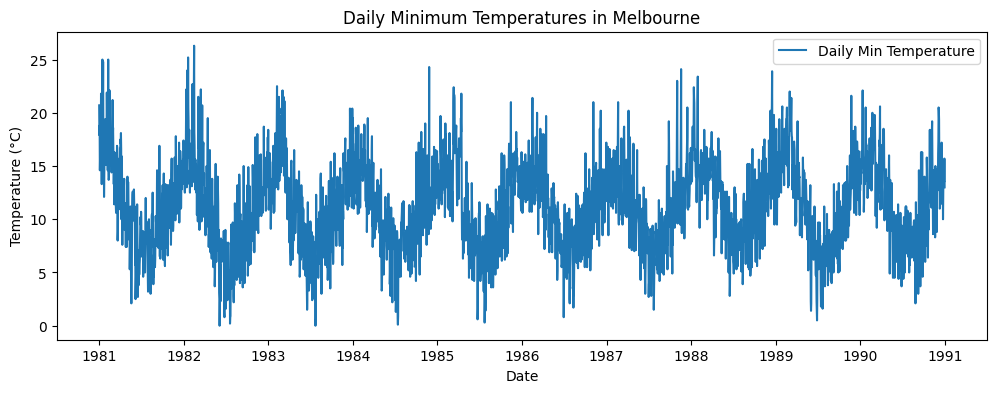

In [ ]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(df['Temp'], label='Daily Min Temperature')
plt.title("Daily Minimum Temperatures in Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


### Data Preprocessing and Visualization

We convert the 'Date' column to datetime, set it as the index, and plot the daily minimum temperatures to visualize the trend.


In [ ]:
# Normalize the temperature values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df['Temp_scaled'] = scaler.fit_transform(df[['Temp']])


### Sequence Creation

The function `create_sequences` is defined to generate sequences of a specified length from the temperature data. We then reshape the input data to be compatible with the LSTM model, which expects input in the shape `[samples, time steps, features]`.


In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 7
temp_values = df['Temp_scaled'].values
X, y = create_sequences(temp_values, sequence_length)

# Reshape input to be [samples, time steps, features] as expected by LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


### Model Definition

A Sequential model is defined using the Keras library. The model consists of:
- An LSTM layer with 50 units and ReLU activation, taking the input with the shape `(sequence_length, 1)`.
- A Dense output layer with a single neuron to predict the temperature value.

The model is compiled with the Adam optimizer and Mean Squared Error (MSE) loss function.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer for predicting temperature

# Compile the model
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Training

The model is trained for 20 epochs, using the training data (`X_train`, `y_train`).
Validation is performed on the test data (`X_test`, `y_test`) to monitor the performance during training.


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0562 - val_loss: 0.0098
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - val_loss: 0.0080
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0076
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - val

### Making Predictions

The model is used to make predictions on both the training data (`X_train`) and the test data (`X_test`).
These predictions are stored in `train_pred` and `test_pred` respectively for further evaluation.


In [ ]:
import numpy as np

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Plotting Actual vs Predicted Values

The following plot compares the actual temperature values from the test set with the predicted values generated by the LSTM model. This helps visualize the model's performance in predicting daily minimum temperatures.


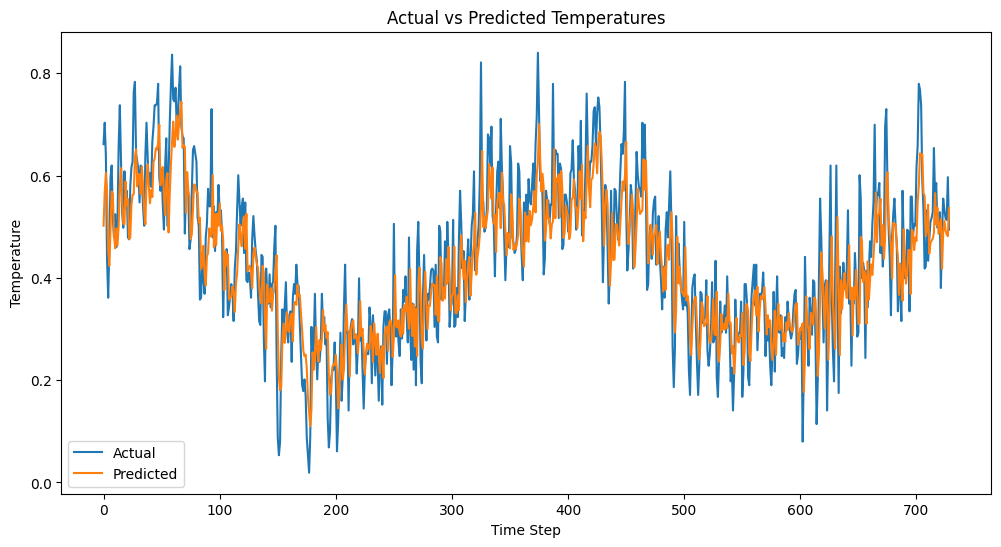

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Model Evaluation

To assess the model's performance, we calculate the **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)** between the actual and predicted temperature values:

- **RMSE**: This metric indicates the average magnitude of error in the model's predictions. Lower values signify better accuracy.
- **MAE**: This metric provides the average absolute difference between predicted and actual values, with lower values indicating better performance.

These metrics help in understanding the quality of the model's predictions.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")



RMSE: 0.0865408208602534
MAE: 0.06831880277827469


### Enhanced Visualization of Actual vs Predicted Temperatures

To provide a clearer comparison of the model's predictions, we plot the first 100 samples of actual vs. predicted temperatures. The markers help to distinguish between the actual values (represented by circles) and predicted values (represented by crosses). This visualization enables us to better observe how closely the predicted values align with the actual data over time.

- **Grid**: Adds a grid to the plot for better readability.
- **Tight Layout**: Ensures the plot is neatly formatted without overlapping labels.

This plot allows us to visually assess how well the model performs on a subset of the data.


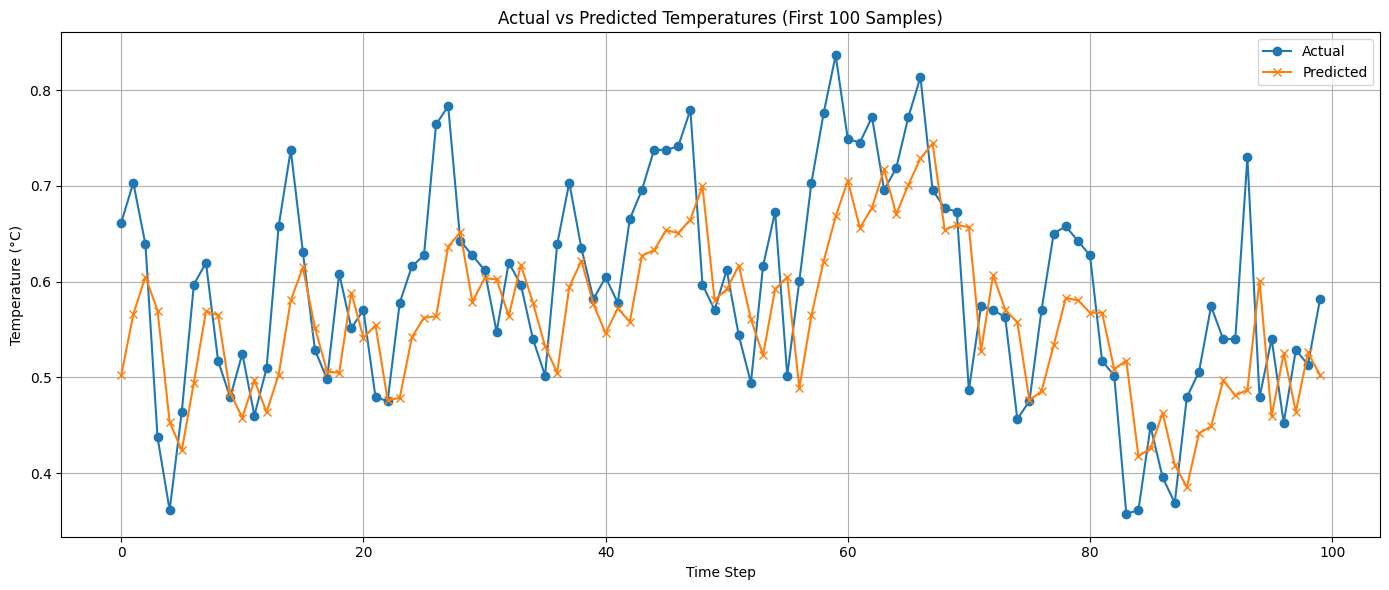

In [ ]:
# Plotting actual vs predicted values (enhanced)
plt.figure(figsize=(14, 6))

# Select a reasonable slice for better visualization
n_samples = 100  # first 100 predictions
plt.plot(y_test[:n_samples], label='Actual', marker='o')
plt.plot(test_pred[:n_samples], label='Predicted', marker='x')

plt.title('Actual vs Predicted Temperatures (First 100 Samples)')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting the 51st Temperature Value with LSTM

1. **Sequence Creation**:
    - Using the last 50 temperature values (sequence length = 50) to predict the next (51st) value.

2. **Model Setup**:
    - A simple LSTM model is used with 30 units.

3. **Prediction**:
    - The model predicts the 51st value from the last 50 values in the test set.

4. **Plotting**:
    - The last 50 values are plotted with the predicted (red) and actual (green) 51st values.

#### Evaluation:
- Compare the predicted value with the actual value to assess the model's performance.


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0529 - val_loss: 0.0102
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0114 - val_loss: 0.0090
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - val_loss: 0.0086
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0103 - val_loss: 0.0085
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0102 - val_loss: 0.0081
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0091 - val_loss: 0.0075
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


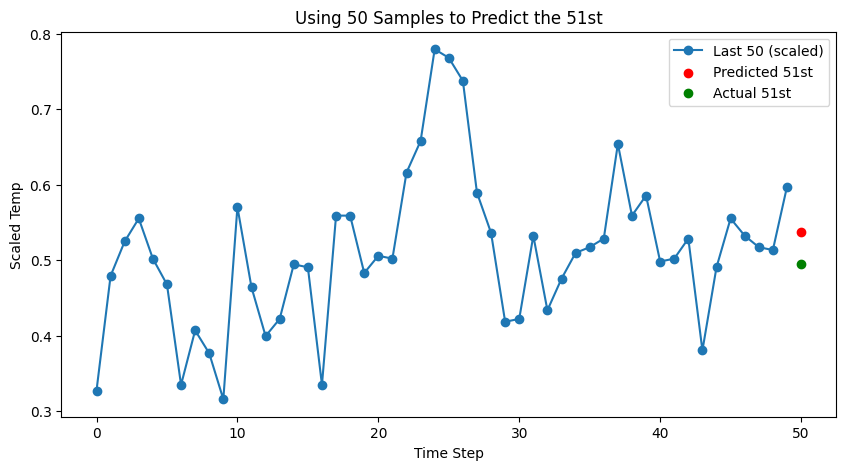

Predicted 51st: 0.5378, Actual 51st: 0.4943


In [ ]:
# 1) Re-create sequences with a 50‑step lookback
sequence_length = 50
temp_values = df['Temp_scaled'].values

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(temp_values, sequence_length)

# 2) Reshape for LSTM: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3) Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4) Build a quick LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(30, activation='relu', input_shape=(sequence_length,1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5) Train (fewer epochs to save time)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 6) Take the last 50 points from the test set and predict the 51st
X_input = X_test[-1].reshape(1, sequence_length, 1)
next_pred = model.predict(X_input)[0,0]
actual_next = y_test[-1]

# 7) Plot the last 50 actual values + the 51st point
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(np.arange(50), X_test[-1].flatten(), marker='o', label='Last 50 (scaled)')
plt.scatter(50, next_pred, color='red', label='Predicted 51st')
plt.scatter(50, actual_next, color='green', label='Actual 51st')
plt.title("Using 50 Samples to Predict the 51st")
plt.xlabel("Time Step")
plt.ylabel("Scaled Temp")
plt.legend()
plt.show()

print(f"Predicted 51st: {next_pred:.4f}, Actual 51st: {actual_next:.4f}")



**Declaration**

I, Kaustubh Wagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/kostawagh/DeepLearningMDM

Signature: Kaustubh Yashwant Wagh